In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Lets load the Boston House Pricing Dataset

In [ ]:
from sklearn.datasets import load_boston

In [3]:
# boston=load_boston()
from sklearn.datasets import fetch_openml

boston = fetch_openml(data_id=42165, as_frame=True)

In [4]:
boston.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
## Lets check the description of the dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
print(boston.data)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... ScreenPorch PoolAre

In [6]:
print(boston.target)

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64


In [7]:
print(boston.feature_names)

['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC'

## Preparing The Dataset

In [8]:
dataset=pd.DataFrame(boston.data,columns=boston.feature_names)

In [9]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [10]:
dataset['Price']=boston.target

In [11]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [13]:
## Summarizing The Stats of the data
dataset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Price
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [15]:
## Check the missing Values
dataset.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
Price              0
Length: 81, dtype: int64

In [ ]:
# ### EXploratory Data Analysis
# ## Correlation
# dataset.corr()

In [ ]:
# import seaborn as sns
# sns.pairplot(dataset)

## Analyzing The Correlated Features

In [44]:
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')
pd.reset_option('display.max_colwidth')

In [47]:
numerical_cols = dataset.select_dtypes(include=['number']).columns
dataset = dataset.select_dtypes(include=['number'])
dataset.isna().sum()
# dataset.info()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
Price              0
dtype: int64

In [48]:
dataset = dataset.dropna()

In [49]:
dataset.isna().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
Price            0
dtype: int64

In [50]:
column_info = pd.DataFrame({
    'Column': dataset.columns,
    'Non-Null Count': dataset.notnull().sum(),
    'Dtype': dataset.dtypes
})

print(column_info)

                      Column  Non-Null Count    Dtype
Id                        Id            1121    int64
MSSubClass        MSSubClass            1121    int64
LotFrontage      LotFrontage            1121  float64
LotArea              LotArea            1121    int64
OverallQual      OverallQual            1121    int64
OverallCond      OverallCond            1121    int64
YearBuilt          YearBuilt            1121    int64
YearRemodAdd    YearRemodAdd            1121    int64
MasVnrArea        MasVnrArea            1121  float64
BsmtFinSF1        BsmtFinSF1            1121    int64
BsmtFinSF2        BsmtFinSF2            1121    int64
BsmtUnfSF          BsmtUnfSF            1121    int64
TotalBsmtSF      TotalBsmtSF            1121    int64
1stFlrSF            1stFlrSF            1121    int64
2ndFlrSF            2ndFlrSF            1121    int64
LowQualFinSF    LowQualFinSF            1121    int64
GrLivArea          GrLivArea            1121    int64
BsmtFullBath    BsmtFullBath

In [51]:
dataset.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Price
Id,1.000000,0.021937,-0.013289,-0.040711,-0.058269,0.004387,-0.020862,-0.027664,-0.073472,-0.013751,...,-0.025060,-0.001972,0.009935,-0.066833,0.015183,0.048010,0.045799,-0.000570,0.013407,-0.047122
MSSubClass,0.021937,1.000000,-0.386940,-0.198096,0.029522,-0.087859,0.025800,0.006645,0.040240,-0.070389,...,-0.017988,0.004054,-0.017790,-0.039739,-0.021789,0.003166,-0.040689,-0.027170,-0.012448,-0.088032
LotFrontage,-0.013289,-0.386940,1.000000,0.421184,0.241322,-0.046312,0.109726,0.086414,0.189969,0.241352,...,0.082166,0.161815,0.014261,0.069716,0.035906,0.211746,0.001471,0.018815,0.013267,0.344270
LotArea,-0.040711,-0.198096,0.421184,1.000000,0.167525,-0.034348,0.029205,0.026848,0.106115,0.230441,...,0.133576,0.099170,-0.023631,0.012520,0.072517,0.109147,0.012790,0.008998,-0.006904,0.299962
OverallQual,-0.058269,0.029522,0.241322,0.167525,1.000000,-0.163157,0.589385,0.570757,0.423988,0.249500,...,0.282512,0.340679,-0.144344,0.017331,0.055296,0.080131,-0.062064,0.079895,-0.008903,0.797881
OverallCond,0.004387,-0.087859,-0.046312,-0.034348,-0.163157,1.000000,-0.426462,0.039402,-0.166762,-0.054788,...,-0.010835,-0.076273,0.062748,-0.006861,0.087030,-0.023566,0.119772,-0.014236,0.041003,-0.124391
YearBuilt,-0.020862,0.025800,0.109726,0.029205,0.589385,-0.426462,1.000000,0.623171,0.332190,0.236941,...,0.238548,0.235432,-0.392693,0.027948,-0.063694,0.006717,-0.096973,0.013784,-0.004585,0.525394
YearRemodAdd,-0.027664,0.006645,0.086414,0.026848,0.570757,0.039402,0.623171,1.000000,0.193376,0.120774,...,0.244602,0.260521,-0.214115,0.026304,-0.034288,0.019307,-0.040420,0.026884,0.041302,0.521253
MasVnrArea,-0.073472,0.040240,0.189969,0.106115,0.423988,-0.166762,0.332190,0.193376,1.000000,0.285331,...,0.174649,0.129532,-0.116832,0.022331,0.052646,0.021648,-0.054044,0.015850,-0.017569,0.488658
BsmtFinSF1,-0.013751,-0.070389,0.241352,0.230441,0.249500,-0.054788,0.236941,0.120774,0.285331,1.000000,...,0.206246,0.127900,-0.105410,0.021831,0.059635,0.194349,0.003027,-0.015281,0.010224,0.390301


Text(0, 0.5, 'Price')

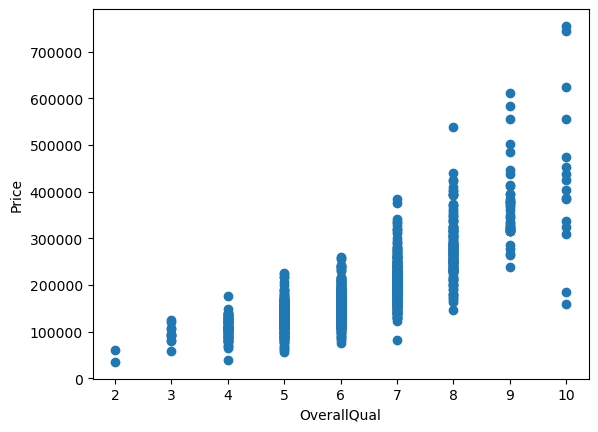

In [52]:
plt.scatter(dataset['OverallQual'],dataset['Price'])
plt.xlabel("OverallQual")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

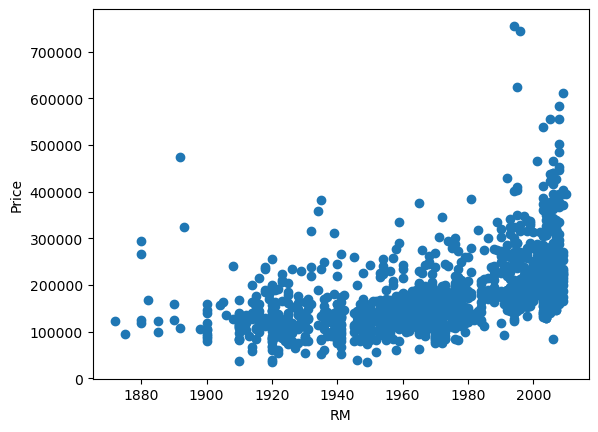

In [19]:
plt.scatter(dataset['YearBuilt'],dataset['Price'])
plt.xlabel("RM")
plt.ylabel("Price")

<Axes: xlabel='YearBuilt', ylabel='Price'>

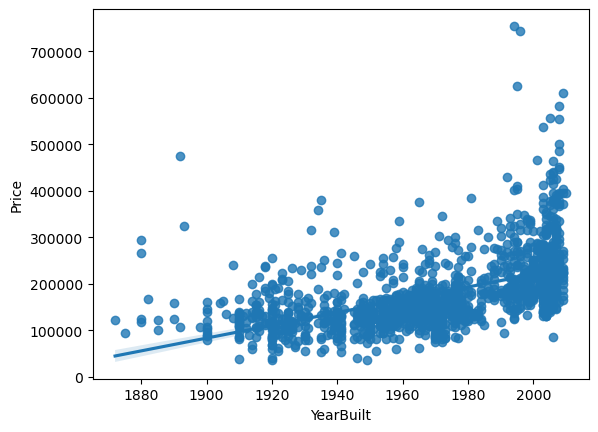

In [20]:
import seaborn as sns
sns.regplot(x="YearBuilt",y="Price",data=dataset)

<Axes: xlabel='OverallQual', ylabel='Price'>

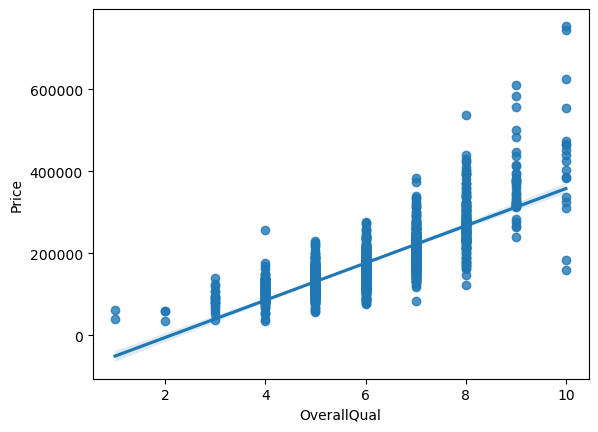

In [21]:
sns.regplot(x="OverallQual",y="Price",data=dataset)

<AxesSubplot:xlabel='CHAS', ylabel='Price'>

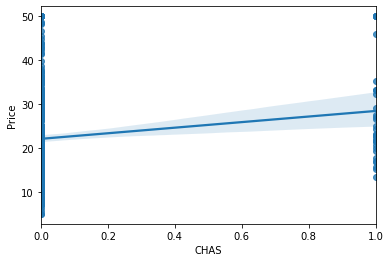

In [ ]:
# sns.regplot(x="CHAS",y="Price",data=dataset)

<AxesSubplot:xlabel='PTRATIO', ylabel='Price'>

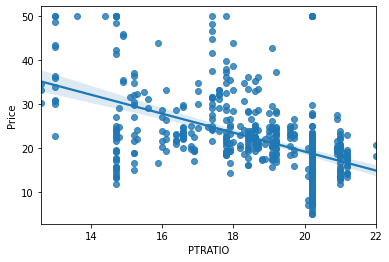

In [ ]:
# sns.regplot(x="PTRATIO",y="Price",data=dataset)

In [53]:
## Independent and Dependent features

X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [55]:
X.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,548,0,61,0,0,0,0,0,2,2008
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,460,298,0,0,0,0,0,0,5,2007
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,608,0,42,0,0,0,0,0,9,2008
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,642,0,35,272,0,0,0,0,2,2006
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,836,192,84,0,0,0,0,0,12,2008


In [54]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: Price, Length: 1121, dtype: int64

In [56]:
##Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [57]:
X_train

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
80,81,60,100.0,13000,6,6,1968,1968,576.0,448,...,509,0,72,0,0,252,0,0,6,2009
922,923,20,65.0,10237,6,5,2005,2006,0.0,28,...,397,100,0,0,23,0,0,0,10,2006
1320,1321,20,70.0,8400,6,3,1957,1957,0.0,189,...,442,114,0,0,0,216,0,0,6,2009
551,552,20,50.0,6000,5,6,1957,1957,0.0,308,...,288,0,0,0,0,0,0,0,6,2008
327,328,20,80.0,11600,6,5,1960,1960,175.0,565,...,292,0,45,0,0,0,0,0,4,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,599,20,80.0,12984,5,6,1977,1977,459.0,1283,...,621,0,0,0,0,0,0,0,3,2006
162,163,20,95.0,12182,7,5,2005,2005,226.0,1201,...,532,0,70,0,0,0,0,0,5,2010
1364,1365,160,30.0,3180,7,5,2005,2005,0.0,0,...,480,0,166,0,0,0,0,0,4,2006
1426,1427,60,81.0,10944,7,5,1994,1994,448.0,1000,...,525,171,132,0,0,0,0,0,8,2008


In [58]:
X_test

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
1297,1298,180,35.0,3675,6,5,2005,2006,82.0,547,...,525,0,44,0,0,0,0,0,6,2006
132,133,20,75.0,7388,5,6,1959,2002,0.0,405,...,624,0,0,0,0,0,0,0,7,2007
300,301,190,90.0,15750,5,5,1953,1953,56.0,841,...,375,0,0,0,0,0,0,0,6,2006
1307,1308,20,60.0,8072,5,5,1994,1995,0.0,746,...,480,0,64,0,0,0,0,0,5,2009
778,779,90,60.0,8400,5,5,1977,1977,320.0,0,...,630,0,0,0,0,0,0,0,10,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022,1023,50,52.0,9439,5,5,1930,1950,0.0,324,...,160,0,0,192,0,0,0,0,3,2007
1216,1217,90,68.0,8930,6,5,1978,1978,0.0,0,...,539,0,0,0,0,0,0,0,4,2010
552,553,20,87.0,11146,8,5,2006,2006,250.0,0,...,908,169,39,0,0,0,0,0,7,2009
890,891,50,60.0,8064,5,7,1949,2006,0.0,0,...,576,0,0,0,0,0,0,2000,7,2007


In [59]:
## Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [60]:
X_train=scaler.fit_transform(X_train)

In [61]:
X_test=scaler.transform(X_test)

In [62]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

In [63]:
X_train

array([[-1.54323237,  0.14299868,  1.17398285, ..., -0.15724157,
        -0.12075359,  0.86240284],
       [ 0.46341929, -0.85354321, -0.23594753, ..., -0.15724157,
         1.36427884, -1.36902893],
       [ 1.4119316 , -0.85354321, -0.03452891, ..., -0.15724157,
        -0.12075359,  0.86240284],
       ...,
       [ 1.51679226,  2.6343534 , -1.64587791, ..., -0.15724157,
        -0.86326981, -1.36902893],
       [ 1.66455046,  0.14299868,  0.40859207, ..., -0.15724157,
         0.62176262,  0.11859225],
       [ 0.92099307, -0.85354321,  0.7711456 , ..., -0.15724157,
         0.62176262, -1.36902893]])

In [64]:
X_test

array([[ 1.35711807,  3.13262435, -1.44445929, ..., -0.15724157,
        -0.12075359, -1.36902893],
       [-1.41930613, -0.85354321,  0.16688972, ..., -0.15724157,
         0.25050452, -0.62521834],
       [-1.01892908,  3.38175982,  0.7711456 , ..., -0.15724157,
        -0.12075359, -1.36902893],
       ...,
       [-0.4183635 , -0.85354321,  0.65029442, ..., -0.15724157,
         0.25050452,  0.86240284],
       [ 0.387157  , -0.1061368 , -0.43736616, ..., 14.04195088,
         0.25050452, -0.62521834],
       [ 0.096407  , -0.85354321, -0.03452891, ..., -0.15724157,
         1.36427884, -1.36902893]])

## Model Training

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
regression=LinearRegression()

In [67]:
regression.fit(X_train,y_train)

LinearRegression()

In [68]:
## print the coefficients and the intercept
print(regression.coef_)

[-9.37366613e+02 -8.90326226e+03 -2.39349731e+03  3.58561479e+03
  2.60183483e+04  5.76204803e+03  1.04483974e+04  2.28398771e+03
  4.39552386e+03 -1.12098630e+17 -3.74610440e+16 -1.04051621e+17
  1.08800892e+17  1.25154560e+16  1.35121675e+16  1.31215243e+15
 -1.64387500e+16  6.20524689e+03 -7.30835971e+02  2.48612022e+03
 -1.41478741e+03 -6.96258184e+03 -4.59847479e+03  8.16561015e+03
  3.18675473e+03 -1.80863014e+03  1.23013715e+04  2.99996113e+03
  2.69201558e+03  1.54162927e+02  9.29092350e+02  1.16684826e+03
  3.19178578e+03 -1.79456926e+03 -1.89497857e+03 -3.92384233e+02
 -2.29965472e+02]


In [69]:
print(regression.intercept_)

182770.66464495732


In [70]:
## on which parameters the model has been trained
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [71]:
### Prediction With Test Data
reg_pred=regression.predict(X_test)

In [72]:
reg_pred

array([150071.1821212 , 163421.71472108, 107328.21173559, 143159.4075182 ,
       162981.12574927, 263995.70242107, 155473.60399868, 161734.8025487 ,
       227178.19736374, 130638.18174066, 179743.32290933, 315266.41491233,
       233970.8871146 , 166030.41817178, 109993.04376507, 126563.02741438,
       179324.23427901, 196974.65938272, 200047.28821858, 191081.18028304,
       222537.38598654, 123455.57236199,  96005.51633395, 221811.48159765,
       143854.24567495, 113105.293043  , 455953.13694856, 128700.18211121,
       171650.73758859, 140719.60425766, 208674.2757912 , 231557.14068474,
       201508.28459251, 281472.50171044, 308625.60844511, 214862.9327156 ,
       191931.92259121, 160017.3309608 , 190490.79324903,  69941.4408005 ,
       175912.85007001, 254292.01794058, 126401.7949635 , 107029.10838552,
       283260.48219161, 240255.89227145, 123986.74883269, 197838.37918212,
       149969.03092306, 178208.84712445, 201333.42620345, 262605.91072825,
       176924.5885367 , 1

## Assumptions

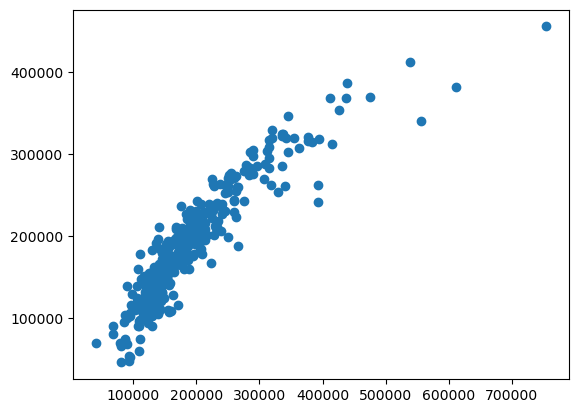

In [73]:
## plot a scatter plot for the prediction
plt.scatter(y_test,reg_pred)

In [74]:
## Residuals
residuals=y_test-reg_pred

In [75]:
residuals

1297   -10071.182121
132    -12671.714721
300     49671.788264
1307    -5159.407518
778    -18981.125749
            ...     
1022   -17352.418618
1216   -36074.337248
552    -13968.425628
890     24123.110394
768    -11543.379707
Name: Price, Length: 337, dtype: float64

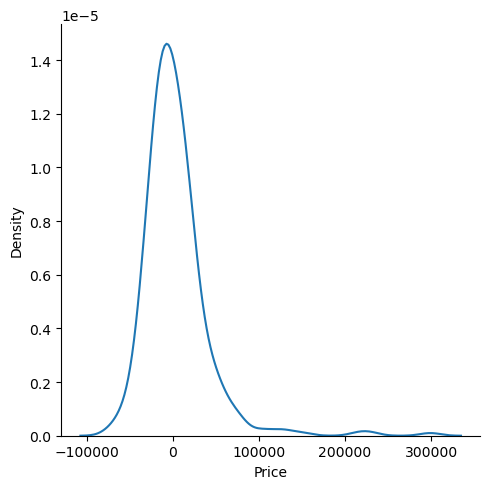

In [76]:
## Plot this residuals 

sns.displot(residuals,kind="kde")

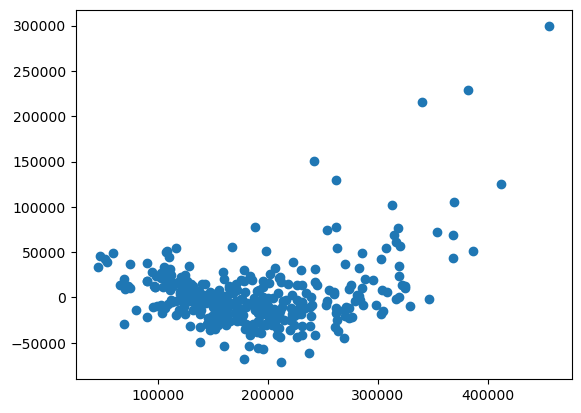

In [77]:
## Scatter plot with respect to prediction and residuals
## uniform distribution
plt.scatter(reg_pred,residuals)

In [78]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,reg_pred))
print(mean_squared_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

23996.475480430032
1455130391.4304492
38146.17138626692


## R square and adjusted R square


Formula

**R^2 = 1 - SSR/SST**


R^2	=	coefficient of determination
SSR	=	sum of squares of residuals
SST	=	total sum of squares


In [79]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

0.8179144863930292


**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 of the model
n: The number of observations
k: The number of predictor variables

In [80]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7953821653112302